<Body>   
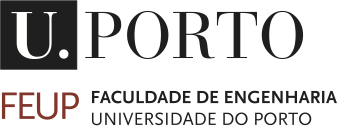   
<h1> <b>Computer Vision </b> </h1>
<p><b>Andry Maykol Pinto </b> (amgp@fe.up.pt)</p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  
FEUP

---

<h1 align="center"><font size="5"> CONVOLUTION </font></h1>



----

<h2>Table of contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="#ref1">Convolution basics</a></li>
    <li><a href="#ref2">Understanding convolution with Python</a></li>
    <li><a href="#ref4">Convolution applied on images</a></li>
</ol>
<p></p>
</div>
<hr>


# Convolution basics

<a id="ref1"></a>
The image below is a 8x8 matrix. Each cell can have the value of 1 (white) or 0 (black).

<center> <img src="https://ibm.box.com/shared/static/0s5v7doe2p5xuzifs47bxmmuwrn3kra2.bmp" alt="HTML5 Icon" style="width: 200px; height: 200px;"> </center>

Note: a binary matrix of image's pixels usually has values (0 or 1) but it can actually have different scales. The most common usage is values between 0 and 255 for 8-bit grayscale images. This will be discussed in the next lecture.

> Convolution filtering is used to modify the spatial frequency characteristics of an image/matrix.

The following animated image demonstrates the two-dimensional convolution operation.

$$
kernel=
\begin{bmatrix}
     1          & 0    & 1     \\
     0          & 1    & 0     \\
     1          & 0    & 1
\end{bmatrix}
\\
$$


$$
I(x,y)=
\begin{bmatrix}
     1          & 1    & 1   & 0    & 0     \\
     0          & 1    & 1   & 1    & 0     \\
     0          & 0    & 1   & 1    & 1     \\
     0          & 0    & 1   & 1    & 0     \\
     0          & 1    & 1   & 0    & 0     \\
\end{bmatrix}
\\
$$


> A kernel defines a mathematical operation comprised of integers and  works by determining the value of a central pixel by adding the weighted values of all its neighbors together.
* Differently sized kernels with different patterns of numbers produce different results under convolution
* The size of a kernel is arbitrary but $3\times 3$ or $5\times 5$  is often used
* The convolution operation is often denoted as $I(x,y) * kernel$
* There is a sliding windows to create a convolution filter. This sliding window goes through the image and creates a new matrix.

-------------
### Exercise 1: (Pen & Paper) Your first convolution

Do the convolution of the previous example by ignoring the frontier condition for this exercise which means, the convolution should be made only when all kernel is complete.



 <center><img src="https://ibm.box.com/shared/static/fvutcm8jwa5j2o7xv2zzqyz2yu3zwhz4.gif" alt="HTML5 Icon" style="width: 450px; height: 300px;">

  Animations showing how a kernel interact with an image. <a href="http://cs231n.github.io/convolutional-networks/">ref</a></center>  


--------------------




----
### Exercise 2: (Pen & Paper) Applying a kernel without normalization

a) Considering the example of the figure below, calculate the result of the convolution filter for the next 3 iterations of the sliding windows.

b) Discuss the results obtained (focusing on the range/scale of the values).


![picture](https://drive.google.com/uc?export=view&id=1_fRDIfa5f4Ragto5hNYHWXUexHSrwCcM)


----


----
### Exercise 3: (Pen & Paper)
What are the expected results for a convolution of $I(x,y)$ with the $kernel_1$ and $kernel_2$:

$$
kernel_1=
\begin{bmatrix}
     0          & 0    & 0     \\
     -1         & 1    & 0     \\
     0          & 0    & 0
\end{bmatrix}
\\
$$


$$
kernel_2=
\begin{bmatrix}
     0          & 0    & 0     \\
     1          & 0    & 0     \\
     0          & 0    & 0
\end{bmatrix}
\\
$$


$$
I(x,y)=
\begin{bmatrix}
     1          & 1    & 1   & 0    & 0     \\
     0          & 1    & 1   & 1    & 0     \\
     0          & 0    & 1   & 1    & 1     \\
     0          & 0    & 1   & 1    & 0     \\
     0          & 1    & 1   & 0    & 0     \\
\end{bmatrix}
\\
$$

----


Be aware the  normalization factor of the kernell used in this example is 1.

$\color{green}{\text{The full explanation of the convolution operation:}}$

To perform a convolution $I(x,y)*kernel$, the values from the kernel were multiplied element-wise with the original matrix (input image), then summed up and then, if we want to keep the same value range, **the last result will be divided by a factor (to normalize it)**. To get the full convolved matrix, the algorithm keep repeating this small procedure for each element by sliding the filter over the whole original matrix.

<center><img src="https://ibm.box.com/shared/static/7maczejdeej0qoz3pzkysw0y8qb70g2h.png" alt="HTML5 Icon" style="width: 500px; height: 200px;">

  Illustration of the operation for one position of the kernel. <a href="http://colah.github.io/posts/2014-07-Understanding-Convolutions/">ref</a></center>


$$$$


$\color{green}{\text{Why kernels are traditionally normalized?}}$
> By normalizing the kernel, we secure that the output  image $I_o(x,y)$ obtained by $I_o(x,y) = I(x,y)*kernel$ will have values within the same range as $I(x,y)$.
> * normalization factor is given by $\frac{1}{\sum_{ij} kernel(i,j)}$
> * protection against overflow issues

$$
kernel_{\text{not-normalized}}=
\begin{bmatrix}
     1          &1    & 1     \\
     1         & 1    & 1     \\
     1          & 1    & 1
\end{bmatrix}
\\
$$

$$
kernel_{\text{normalized}}= \frac{1}{9}
\begin{bmatrix}
     1          &1    & 1     \\
     1         & 1    & 1     \\
     1          & 1    & 1
\end{bmatrix}
\\
$$






Some practical examples:


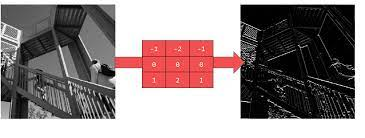


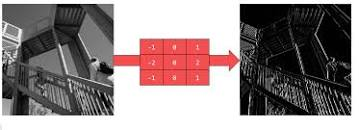


<h1> Introduction to Padding</h1>

> For a matrix (n x n) and  filter/kernel (f x f):
>
> the dimensions of the output matrix resulting from a convolution operation is (n – f + 1) x (n – f + 1).
>

For example, for an (8 x 8) matrix and (3 x 3) kernel, the output resulting after convolution operation would be of size (6 x 6). **Thus, the 2D matrix shrinks every time a convolution operation is performed**.


We have to come with the solution of padding zeros on the input matrix.

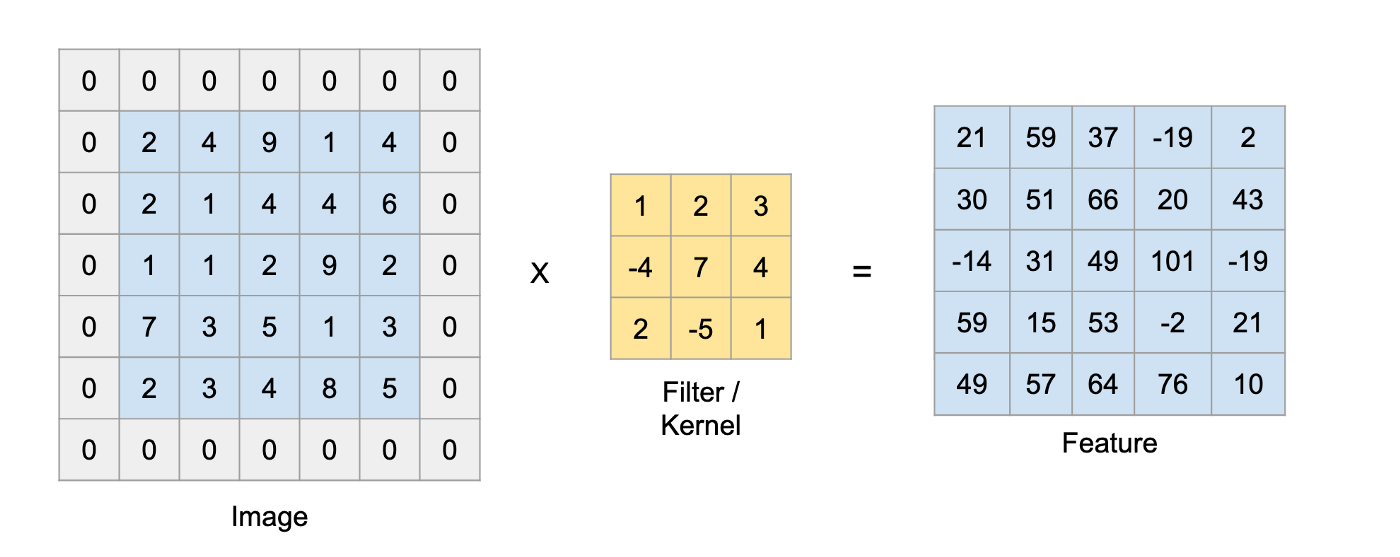

> This prevents shrinking the $I_o(x,y)$ when compared to $I(x,y)$. Please consider that :
> * (f x f) is the size of the kernel (aka filter)
> * p = number of layers of zeros added to the border of the image, p = (f – 1) / 2.
> * the original (n x n) matrix becomes a (n + 2p) x (n + 2p) matrix padding
> * After convolution, the output matrix is (n + 2p – f + 1) x (n + 2p – f + 1).

For example, padding a 8 x 8 matrix with a 3 x 3 kernel will result in a 8 x 8 output matrix after performing convolution operation.

There are three methods to apply kernel on the matrix during the convolution:
* <b>Full Padding</b>: the output image has a bigger dimension as the input image.
* <b>Same Padding</b>: the output image has the same dimension as the input image.
* <b>Valid Padding</b>: there is no padding (input matrix is unchanged).


![picture](https://drive.google.com/uc?export=view&id=1Tl5F_LDzFFuvdxXsh15yNgg7Bpk6hXY_)
<a href="https://numbersmithy.com">ref</a>


-------------
### Demonstration 1 - Image Convolution in Python

We will use the ''correlate'' operator for convenience. This topic will be discussed below.

In [ ]:
from scipy import signal as sg

g = [[1, 0, -1],
     [1, 0, -1],
     [1, 0, -1]]
I = [[1, 2, 0, 4, 5],
     [5, 6, 0, 8, 6],
     [4, 4, 0, 4, 7],
     [1, 2, 0, 4, 8]]


print('With zero padding (full):')
conv_full = sg.correlate( I, g, 'full')
print('{0} \n'.format(conv_full))

print('With zero padding (same):')
conv_same = sg.correlate( I, g, 'same')
print('{0} \n'.format(conv_same))

print('Without zero padding (valid):')
conv_valid = sg.correlate( I, g, 'valid')
print('{0} \n'.format(conv_valid))

With zero padding (full):
[[ -1  -2   1  -2  -5   4   5]
 [ -6  -8   6  -4 -11  12  11]
 [-10 -12  10  -4 -18  16  18]
 [-10 -12  10  -4 -21  16  21]
 [ -5  -6   5  -2 -15   8  15]
 [ -1  -2   1  -2  -8   4   8]] 

With zero padding (same):
[[ -8   6  -4 -11  12]
 [-12  10  -4 -18  16]
 [-12  10  -4 -21  16]
 [ -6   5  -2 -15   8]] 

Without zero padding (valid):
[[ 10  -4 -18]
 [ 10  -4 -21]] 



-----------------
----------------

### Exercise 4: Correlation versus Convolution in Python

a) Use the same Image and $kernel$ from the previous demonstration to compare the difference of using the ''correlation'' and the ''convolution'' operators.

b) Discuss when both operators will give the same result


In [ ]:
from scipy import signal as sg

g = [[1, 0, -1],
     [1, 0, -1],
     [1, 0, -1]]
I = [[1, 2, 0, 4, 5],
     [5, 6, 0, 8, 6],
     [4, 4, 0, 4, 7],
     [1, 2, 0, 4, 8]]

print('With zero padding (full):')
conv_full = sg.convolve( I, g, 'full')
print('{0} \n'.format(conv_full))

print('With zero padding (same):')
conv_same = sg.convolve( I, g, 'same')
print('{0} \n'.format(conv_same))

print('Without zero padding (valid):')
conv_valid = sg.convolve( I, g, 'valid')
print('{0} \n'.format(conv_valid))

With zero padding (full):
[[  1   2  -1   2   5  -4  -5]
 [  6   8  -6   4  11 -12 -11]
 [ 10  12 -10   4  18 -16 -18]
 [ 10  12 -10   4  21 -16 -21]
 [  5   6  -5   2  15  -8 -15]
 [  1   2  -1   2   8  -4  -8]] 

With zero padding (same):
[[  8  -6   4  11 -12]
 [ 12 -10   4  18 -16]
 [ 12 -10   4  21 -16]
 [  6  -5   2  15  -8]] 

Without zero padding (valid):
[[-10   4  18]
 [-10   4  21]] 



solution b):


In [ ]:
# Because the matrixes (Kernels in correlation compared with convolution) are symetric the results are with opposed signals

--------------------


$\color{green}{\text{Convolution (mathematical definition):}}$


What we have been seen is actually $\color{red}{\text{correlation and not convolution}}$ since the 2D convolution is given by:

<font size="4">$$ I'= \sum\limits_{u,v} I(x-u,y-v)g(u,v) $$ </font>

In practice, the convolution operation is very similar to the correlation operation but has a slight difference. In Convolution operation, the kernel is first flipped by an angle of 180 degrees and is then applied to the image which means:
$$
k =
\begin{bmatrix}
     a          &b    & c     \\
     h         & i    & d     \\
     g          & f    & e
\end{bmatrix}
\\
$$

$$
k_{\text{flipped}}=
\begin{bmatrix}
     e          &f    & g     \\
     d         & i    & h     \\
     c          & b    & a
\end{bmatrix}
\\
$$

**So, it's only a matter of flipping the kernel accordingly and the convolution operation will be equal to the correlation operation.**





----------
### Demonstration 2: Convolution (mathematical definition)


Consider a 3x3 matrix I, the kernel g = [-1 1] and the zero padding (same) convolution. Please note that when we always use h inversion.

$$
I=
\begin{bmatrix}
     255          & 7      & 3     \\
     212          & 240    & 4     \\
     218          & 216    & 230
\end{bmatrix}
\\
$$

$$
g=
\begin{bmatrix}
     -1          & 1      
\end{bmatrix}
\\
$$
  
$
\begin{bmatrix}
    \textbf{1}\ast \textbf{0}      & \textbf{-1} \ast \textbf{255}  & 7      & 3     \\
    0              & 212          & 240    & 4     \\
    0              & 218          & 216    & 230
\end{bmatrix}
\rightarrow
\begin{bmatrix}
    \textbf{-255}  &  X     & X     \\
    X            & X    & X     \\
    X            & X    & X
\end{bmatrix}
\\
$

$
\begin{bmatrix}
    \textbf{1}\ast \textbf{255}      & \textbf{-1} \ast \textbf{7}  & 3    \\
    212          & 240    & 4     \\
    218          & 216    & 230
\end{bmatrix}
\rightarrow
\begin{bmatrix}
    -255           & \textbf{248}      & X     \\
    X            & X    & X     \\
    X            & X    & X
\end{bmatrix}
\\
$

$
\begin{bmatrix}
    255          & \textbf{1}\ast\textbf{7}  & \textbf{-1}\ast\textbf{3}    \\
    212          & 240    & 4     \\
    218          & 216    & 230
\end{bmatrix}
\rightarrow
\begin{bmatrix}
    -255           & 248      & \textbf{4}     \\
    X            & X      & X     \\
    X            & X      & X
\end{bmatrix}
\\
$

  
$
\begin{bmatrix}
    0              & 255          & 7          & 3     \\
    \textbf{1}\ast \textbf{0}    & \textbf{-1} \ast \textbf{212}  & 240     & 4     \\
    0              & 218          & 216    & 230
\end{bmatrix}
\rightarrow
\begin{bmatrix}
    -255           & 248  & 4     \\
    \textbf{-212}  & X    & X     \\
    X              & X    & X
\end{bmatrix}
\\
$
...
----------

---

**Exercise 5** Compute the convolution (mathematical definition) of matrix I from previous example with the h= [ [-1  1] , [2   3] ]

a) Determine the result of the convolution by hand (same padding).

b) Determine the result of the convolution using Python (full, same and valid modes).


In [2]:
from scipy import signal as sg

I= [[255,   7,  3],
    [212, 240,  4],
    [218, 216, 230],]

h= [[-1, 1],
    [2, 3]]

print('With zero padding (full):')
conv_full = sg.correlate( I, h, 'full')
print('{0} \n'.format(conv_full))

print('With zero padding (same):')
conv_same = sg.correlate( I, h, 'same')
print('{0} \n'.format(conv_same))

print('Without zero padding (valid):')
conv_valid = sg.correlate( I, h, 'valid')
print('{0} \n'.format(conv_valid))

With zero padding (full):
[[ 765  531   23    6]
 [ 891  896  488    5]
 [ 866 1112  886  456]
 [ 218   -2   14 -230]] 

With zero padding (same):
[[ 765  531   23]
 [ 891  896  488]
 [ 866 1112  886]] 

Without zero padding (valid):
[[ 896  488]
 [1112  886]] 



----------------

---------------
<a id="ref4"></a>
### Demonstration 3: Convolution applied on images

Convolution is an important process in Computer Vision.
The following code is **only for demonstration purposes** (the code is not for interpretation) and aims to provide an application example for the convolution operation.



In [5]:
# download standard image
!wget --quiet https://ibm.box.com/shared/static/cn7yt7z10j8rx6um1v9seagpgmzzxnlz.jpg --output-document bird.jpg


 Original type: <PIL.Image.Image image mode=L size=1920x1440 at 0x7A9E2550ECB0> 


After conversion to numerical representation: 

 array([[ 64,  71,  65, ...,  49,  47,  48],
       [ 68,  71,  64, ...,  54,  52,  51],
       [ 65,  69,  66, ...,  54,  50,  55],
       ...,
       [ 22,  23,  23, ..., 184, 170, 155],
       [ 18,  21,  26, ..., 179, 166, 153],
       [ 27,  22,  21, ..., 170, 159, 149]], dtype=uint8)

 Input image converted to gray scale: 



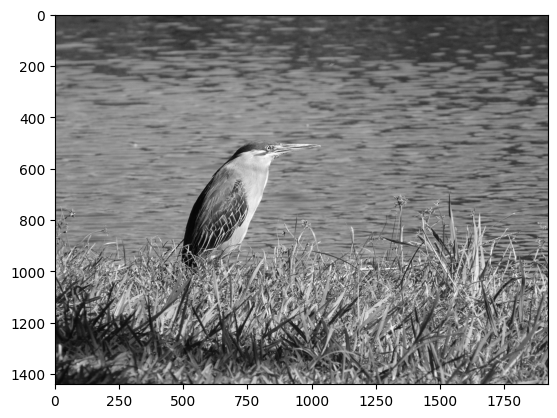

In [6]:

#Importing
import numpy as np
from scipy import signal as sg
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open('bird.jpg')  # type here your image's name

image_gr = im.convert("L")    # convert("L") translate color images into black and white
                              # uses the ITU-R 601-2 Luma transform (there are several
                              # ways to convert an image to grey scale)
print("\n Original type: %r \n\n" % image_gr)

# convert image to a matrix with values from 0 to 255 (uint8)
arr = np.asarray(image_gr)
print("After conversion to numerical representation: \n\n %r" % arr)

### Activating matplotlib for Ipython
%matplotlib inline

### Plot image
imgplot = plt.imshow(arr)
imgplot.set_cmap('gray')  #you can experiment different colormaps (Grey,winter,autumn)
print("\n Input image converted to gray scale: \n")
plt.show(imgplot)

Now, we will experiment using an edge detector kernel:
$$
h = \begin{bmatrix}
0 & 1 & 0\\
1 & -4 & 1\\
0 & 1 & 0
\end{bmatrix}
$$


GRADIENT MAGNITUDE - Feature map


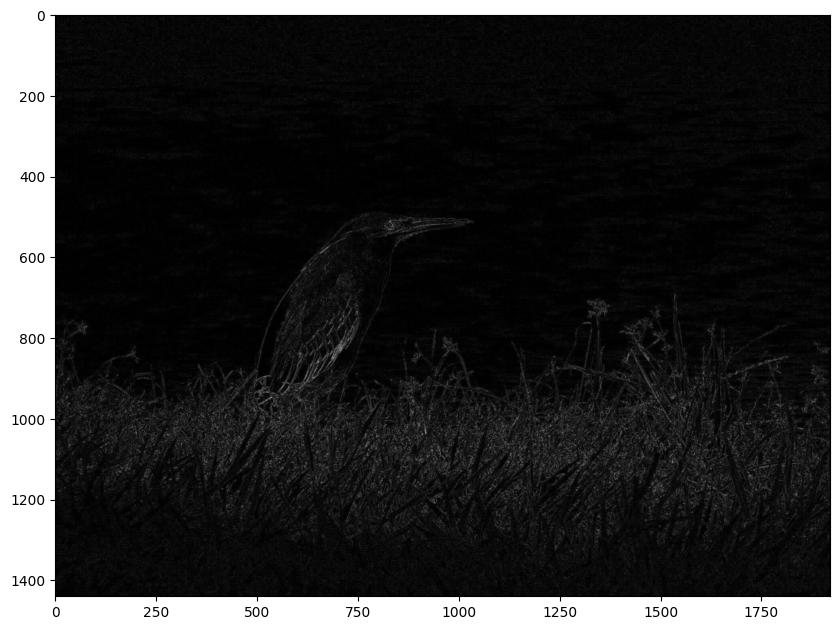

In [9]:
kernel = np.array([[ 0, 1, 0],
                   [ 1,-4, 1],
                   [ 0, 1, 0],])

grad = sg.convolve2d(arr, kernel, mode='same', boundary='symm')



%matplotlib inline
print('GRADIENT MAGNITUDE - Feature map')
fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad), cmap='gray')

In [11]:
type(grad)

grad_biases = np.absolute(grad) + 100

grad_biases[grad_biases > 255] = 255


GRADIENT MAGNITUDE - Feature map


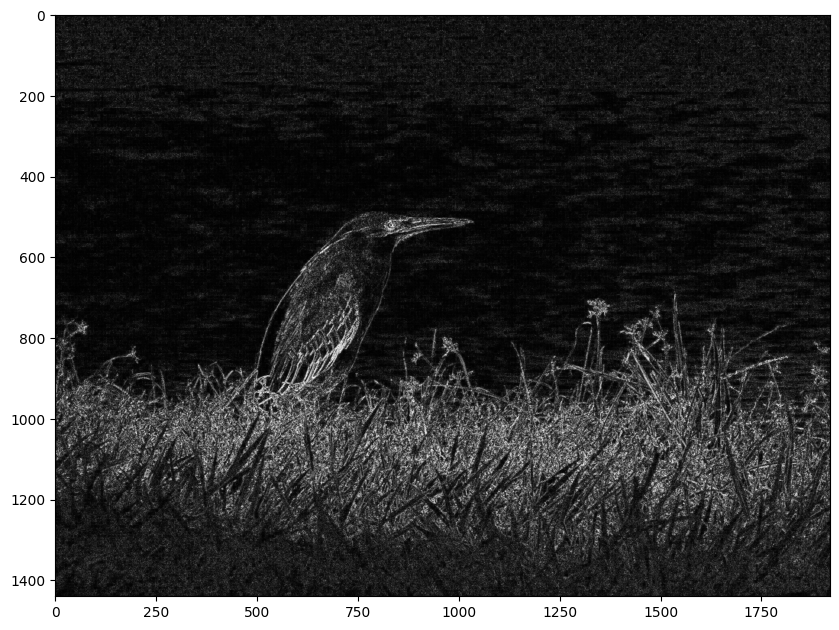

In [12]:
%matplotlib inline

print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad_biases), cmap='gray')

Lets see how it works for a digit:

In [13]:
# download standard image
!wget --quiet https://ibm.box.com/shared/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg --output-document num3.jpg


 Input image converted to gray scale: 



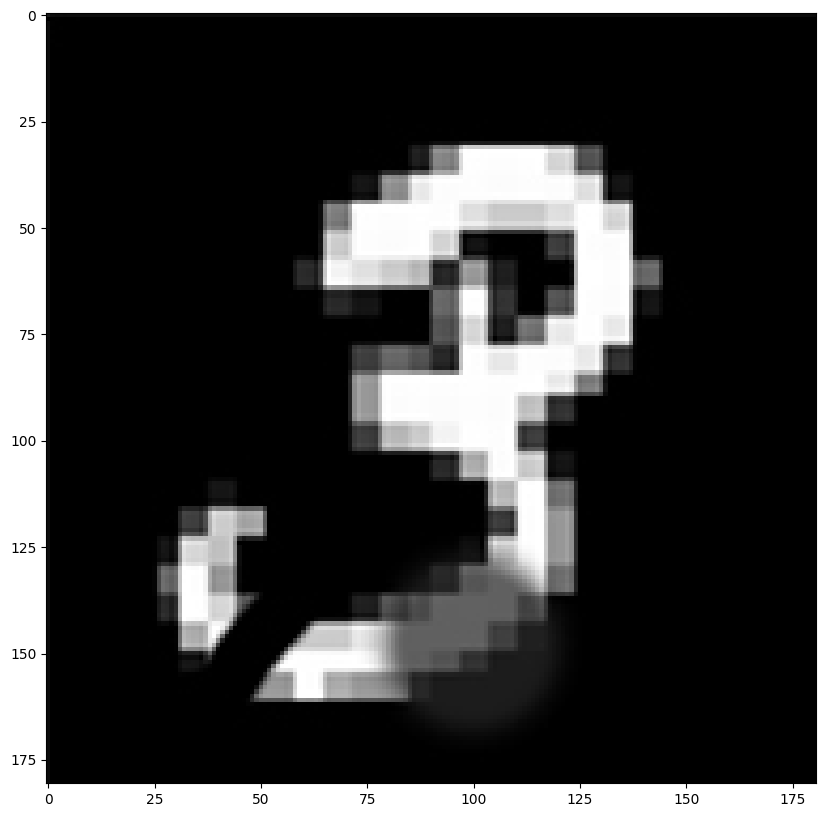

In [15]:

#Importing
import numpy as np
from scipy import signal
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open('num3.jpg')  # type here your image's name

image_gr = im.convert("L")    # convert("L") translate color images into black and white
                              # uses the ITU-R 601-2 Luma transform (there are several
                              # ways to convert an image to grey scale)
#print("\n Original type: %r \n\n" % image_gr)

# convert image to a matrix with values from 0 to 255 (uint8)
arr = np.asarray(image_gr)
#print("After conversion to numerical representation: \n\n %r" % arr)


### Activating matplotlib for Ipython
%matplotlib inline

### Plot image
fig, aux = plt.subplots(figsize=(10, 10))
imgplot = plt.imshow(arr)
imgplot.set_cmap('gray')  #you can experiment different colormaps (Greys,winter,autumn)
print("\n Input image converted to gray scale: \n")
plt.show(imgplot)

With the same edge detector kernel.

$$
h = \begin{bmatrix}
0 & 1 & 0\\
1 & -4 & 1\\
0 & 1 & 0
\end{bmatrix}
$$

GRADIENT MAGNITUDE - Feature map


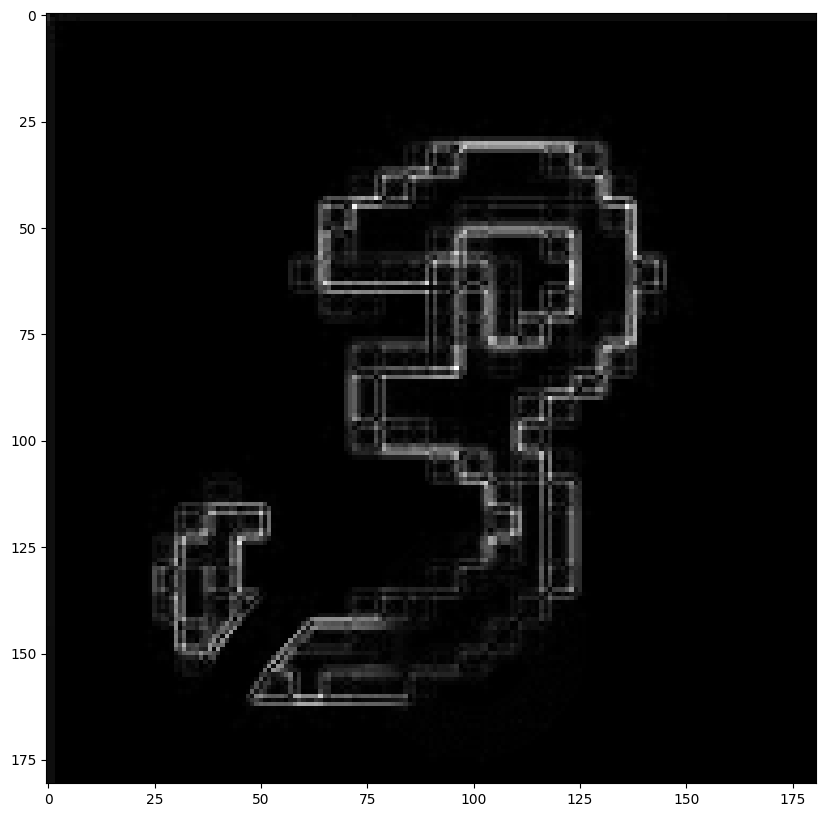

In [26]:
# Edge detection Kernel
kernel = np.array([
                        [ 0, 1, 0],
                        [ 1,-4, 1],
                        [ 0, 1, 0],
                                     ])

# Sobel Edge detection Kernel (Horizontal)
kernel_sobel_h = np.array([
                        [-1,-2,-1],
                        [ 0, 0, 0],
                        [ 1, 2, 1],
                                     ])

# Sobel Edge detection Kernel (Vertical)
kernel_sobel_v = kernel_sobel_h.T

grad = signal.convolve2d(arr, kernel, mode='same', boundary='symm')


%matplotlib inline
print('GRADIENT MAGNITUDE - Feature map')
fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad), cmap='gray')


<hr>

End.

# REFERENCES

https://github.com/joanbruna/stat212b/blob/master/lec1.pdf  
http://deeplearning.stanford.edu/wiki/index.php/Feature_extraction_using_convolution  
http://homepages.inf.ed.ac.uk/rbf/HIPR2/fourier.htm  
[Cognitive Class](https://cocl.us/DX0108EN_CC)